<a href="https://colab.research.google.com/github/seanzhu815/402/blob/main/assignment_1_sample_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Solution

In [7]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.xlsx to AAPL.xlsx


### We first import the necessary packages

In [8]:
import pandas            as pd   
import numpy             as np   
import scipy             as scp  
import matplotlib.pyplot as plt 
import os as os
from datetime import date as dd 
from scipy import stats    
from scipy import optimize
import statsmodels.api as sm
# %matplotlib inline

### We now get the data


In [40]:
os.getcwd()
df=pd.read_excel('AAPL.xlsx')
os.getcwd()

'/content'

## Part One

In [41]:
df.head()
date=df.iloc[:,0]

In [42]:
df['cd']=np.log(df['Adj Close']/df['Adj Close'].shift(1)).dropna()

In [71]:
c=df['cd']
np.mean(c)
np.std(c)


df['d']=(df['Adj Close']-df['Adj Close'].shift(1))
d=df['d']/df['Adj Close'].shift(1)
np.mean(c)

0.0011619812436020355

In [72]:
def maxdrawdown(x): 
    """
    NumPy analog to corresponding MATLAB Financial Toolbox Function
    OUTPUT: start, end, and max drawdown in terms of max percentage drop from a peak
    """
    i = np.argmax(np.maximum.accumulate(x) - x) # end of period
    j = np.argmax(x[:i]) # start of the period
    percent_change = 100*( x[i] - x[j] ) / x[j]
    return j,i,percent_change

def datenum(date):
    """
    Converts yyyymmdd dates to ordinal code
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])
        dn[i] = dd.toordinal(dd(int(dt[0:4]),int(dt[4:6]),int(dt[6:8])))
    return dn

In [83]:
cumulativeret = np.cumprod(d+1)

cumulativeret[0]=1
cumulativeret[0]

1.0

In [84]:
MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret[1:])
begdate = date[MaxDDStartIndex]
enddate = date[MaxDDEndIndex]
MaxDD

-18.598862756655993

In [85]:
print(f'The Maximum Drawdown is {MaxDD:.4}%')

The Maximum Drawdown is -18.6%


In [86]:
print(f'Max VC DrawDown from date {begdate} to date {enddate}')

Max VC DrawDown from date 2021-01-26 00:00:00 to date 2021-03-08 00:00:00


g. Checking normality

(array([  1.,   2.,   5.,  32., 107., 295., 311.,  93.,  15.,   3.]),
 array([-0.21763043, -0.17956269, -0.14149496, -0.10342723, -0.0653595 ,
        -0.02729176,  0.01077597,  0.0488437 ,  0.08691143,  0.12497917,
         0.1630469 ]),
 <a list of 10 Patch objects>)

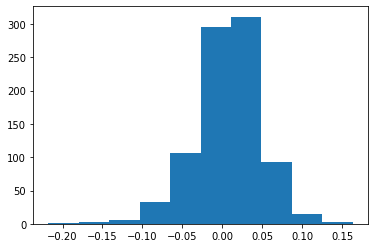

In [ ]:
plt.hist(returns)

Looking at the histogram, skewness and kurtosis, we conclude xxx.

### Question 2.2

We first setup the Sharpe ratio function for the optimization problem. 

In [ ]:
def Shratio(w,mu,Sigma,Rf): 
    portfolio_return = np.sum(mu * w) - Rf    # portfolio excess return
    portfolio_vol    = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))  # portfolio volatility
    return portfolio_return / portfolio_vol

We now need to set the risk free rate and select the number of assets in our portfolio.

In [ ]:
Rf = rfrate[len(rfrate)-1]  # risk free rate
n = 2                      # number of assets
tbonds_ret = df.iloc[:,4]   # tbonds
tbills_ret =df.iloc[:,6]    # tbills
Rf

8.1e-05

Combine stock, and bond returns in to a matrix, calculate the mean return of all assets, and the covariance.

In [ ]:
ret = np.concatenate((np.expand_dims(returns,1), np.expand_dims(tbonds_ret,1)),axis = 1)
mu = np.mean(ret, axis = 0)
Sigma = np.cov(ret, rowvar = False)
Sigma

array([[1.72729425e-03, 5.52795606e-05],
       [5.52795606e-05, 4.27534215e-04]])

Set the initial weights to be equal

In [ ]:
w0 = np.ones((n,1))/n 
w0

array([[0.5],
       [0.5]])

Set the constraint condition and solve for the tangency portfolio.

In [ ]:
cons = ({'type' : 'eq', 'fun': lambda x: x[0] + x[1] - 1}) # portfolio weights sum to 1

# solve for tangency portfolio
sol = scp.optimize.minimize(lambda w: -Shratio(w, mu, Sigma, Rf), x0 = w0, constraints = cons) 
w_uncon = sol.x
val = -sol.fun

print(f'optimal weights are {w_uncon} with Sharpe ratio {val:.2}')


optimal weights are [0.27653573 0.72346427] with Sharpe ratio 0.28


Calculate the mean and variance of the tangency portfolio, and the weight on the portfolio.

In [ ]:
#### add risk-free asset
gam = 5                                         # gamma: risk aversion coefficient
mu_uncon  = w_uncon.T.dot(mu)                   # mean of tangency portfolio
var_uncon = np.dot(w_uncon.T, np.dot(Sigma,w_uncon))                                    # variance of tangency portfolio
wT_con    =(mu_uncon-Rf)/(gam*var_uncon)                                    # weight to be put in the tangency when maximizing mean variance utility
rcon      = wT_con*mu_uncon + (1-wT_con)*Rf

In [ ]:
c=np.dot(Sigma,w_uncon)
w_uncon


array([0.27653573, 0.72346427])

In [ ]:
print(f'The mean of the tnagency portfolio is :{mu_uncon:.2}')
print(f'The variance of the tangency portfolio is : {var_uncon:.2}')
print(f'The weight on the risky portfolio is : {wT_con:.2}')
print(f'The return of the tangency portfolio is : {rcon:.2}')


The mean of the tnagency portfolio is :0.0055
The variance of the tangency portfolio is : 0.00038
The weight on the risky portfolio is : 2.8
The return of the tangency portfolio is : 0.015


### Question 2.3

In [ ]:
delta = tbonds_ret - returns
sumd=0
for i in delta:
    if i>0:
        sumd+=1
    
under = sumd / dim

In [ ]:
print(f'a. Stocks underperform bonds approx. {100*under:.4}% of the time.')

a. Stocks underperform bonds approx. 43.98% of the time.


In [ ]:
def CumReturnsAndDeltas(df, num_months, dim):
    
    ret =[]
    delta = []
    stk=[]
    bond=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        delta.append(ret[i-num_months+1][1]- ret[i-num_months+1][0])

    ret = np.array(ret)
    delta = np.array(delta)
    stk.append(ret[i-num_months+1][0])
    bond=stk.append(ret[i-num_months+1][1])
    return ret, delta 



In [ ]:
ret_cumulative_1yr, delta_1yr = CumReturnsAndDeltas(df, 12, dim)
sumd1=0
for i in delta_1yr:
    if i>0:
        sumd1+=1
delt_1yr=sumd1 / delta_1yr.shape[0]

ret_cumulative_5yr, delta_5yr = CumReturnsAndDeltas(df, 60, dim)
sumd2=0
for i in delta_5yr:
    if i>0:
        sumd2+=1


ret_cumulative_10yr, delta_10yr = CumReturnsAndDeltas(df, 120, dim)
sumd3=0
for i in delta_10yr:
    if i>0:
        sumd3+=1
delt_10yr=sumd3 / delta_10yr.shape[0]

In [ ]:
print( f'b.i At the 1 year horizon stocks underperformed bonds {delt_1yr*100:.4}% of the time.')

b.i At the 1 year horizon stocks underperformed bonds 40.09% of the time.


In [ ]:
print(f'b.ii At the 5 year horizon stocks underperformed bonds {delt_5yr*100:.4}% of the time.')

b.ii At the 5 year horizon stocks underperformed bonds 40.87% of the time.


In [ ]:
print(f'b.iii At the 10 year horizon stocks underperformed bonds {delt_10yr*100:.4}% of the time.')

b.iii At the 10 year horizon stocks underperformed bonds 43.09% of the time.


In [ ]:
def CumStocksAndBonds(df, num_months, dim):
    
    ret =[]
    stk=[]
    bond=[]
    tbl=[]
    btc=[]
    gld=[]
    inf=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        stk.append(ret[i-num_months+1][0])
        bond.append(ret[i-num_months+1][1])
        tbl.append(ret[i-num_months+1][2])
        btc.append(ret[i-num_months+1][3])
        gld.append(ret[i-num_months+1][4])
        inf.append(ret[i-num_months+1][5])
    ret = np.array(ret)
    stk = np.array(stk)
    bond= np.array(bond)
    tbl = np.array(tbl)
    btc = np.array(btc)
    gld = np.array(gld)
    inf = np.array(inf)
    return  stk,bond


In [ ]:
stk_1yr, bond_1yr = CumStocksAndBonds(df, 12, dim)

In [ ]:
var_stk_1yr=np.var(stk_1yr)
var_bond_1yr=np.var(bond_1yr)
print( f' At the 1 year horizon, the variance of stocks returns is {var_stk_1yr*100:.4}% ')
print( f' At the 1 year horizon, the variance of bonds returns is {var_bond_1yr*100:.4}% ')

 At the 1 year horizon, the variance of stocks returns is 2.26% 
 At the 1 year horizon, the variance of bonds returns is 0.6088% 


In [ ]:
stk_5yr, bond_5yr = CumStocksAndBonds(df, 60, dim)
var_stk_5yr=np.var(stk_5yr)
var_bond_5yr=np.var(bond_5yr)
print( f' At the 5 year horizon, the variance of stocks returns is {var_stk_5yr*100:.4}% ')
print( f' At the 5 year horizon, the variance of bonds returns is {var_bond_5yr*100:.4}% ')

 At the 5 year horizon, the variance of stocks returns is 21.6% 
 At the 5 year horizon, the variance of bonds returns is 7.57% 


In [ ]:
stk_10yr, bond_10yr = CumStocksAndBonds(df, 120, dim)
var_stk_10yr=np.var(stk_10yr)
var_bond_10yr=np.var(bond_10yr)
print( f' At the 10 year horizon, the variance of stocks returns is {var_stk_10yr*100:.4}% ')
print( f' At the 10 year horizon, the variance of bonds returns is {var_bond_10yr*100:.4}% ')

 At the 10 year horizon, the variance of stocks returns is 76.57% 
 At the 10 year horizon, the variance of bonds returns is 37.25% 


## PART 3

US stocks


In [ ]:
def ReturnsAndCov(df, num_months, dim):
    
    ret =[]
    stk=[]
    tbl=[]
    btc=[]
    gld=[]
    inf=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        stk.append(ret[i-num_months+1][0])
        tbl.append(ret[i-num_months+1][2])
        btc.append(ret[i-num_months+1][3])
        gld.append(ret[i-num_months+1][4])
        inf.append(ret[i-num_months+1][5])
    ret = np.array(ret)
    stk = np.array(stk)
    tbl = np.array(tbl)
    btc = np.array(btc)
    gld = np.array(gld)
    inf = np.array(inf)
    return  stk,tbl,btc,gld,inf


In [ ]:
stk_3m,tbl_3m,btc_3m,gld_3m,inf_3m=ReturnsAndCov(df, 3, dim)

In [ ]:
btc_3m = btc_3m[~np.isnan(btc_3m)]
gld_3m=gld_3m[~np.isnan(gld_3m)]

In [ ]:
a3=np.corrcoef(stk_3m,inf_3m)[0][1]
b3=np.corrcoef(tbl_3m,inf_3m)[0][1]
c3=np.corrcoef(btc_3m,inf_3m[777:])[0][1]
d3=np.corrcoef(gld_3m,inf_3m[608:])[0][1]
print(f'The covirance of three months stocks and inflation is {a3:.5}')
print(f'The covirance of three months T-bills and inflation is {b3:.5}')
print(f'The covirance of three months Bitcoin and inflation is {c3:.5}')
print(f'The covirance of three months gold and inflation is {d3:.5}')

The covirance of three months stocks and inflation is -0.069678
The covirance of three months T-bills and inflation is 0.48414
The covirance of three months Bitcoin and inflation is 0.075066
The covirance of three months gold and inflation is 0.033833


In [ ]:
stk_12m,tbl_12m,btc_12m,gld_12m,inf_12m=ReturnsAndCov(df, 12, dim)

In [ ]:
btc_12m = btc_12m[~np.isnan(btc_12m)]
gld_12m=gld_12m[~np.isnan(gld_12m)]

In [ ]:
a12=np.corrcoef(stk_12m,inf_12m)[0][1]
b12=np.corrcoef(tbl_12m,inf_12m)[0][1]
c12=np.corrcoef(btc_12m,inf_12m[777:])[0][1]
d12=np.corrcoef(gld_12m,inf_12m[608:])[0][1]
print(f'The covirance of 12 months stocks and inflation is {a12:.5}')
print(f'The covirance of 12 months T-bills and inflation is {b12:.5}')
print(f'The covirance of 12 months Bitcoin and inflation is {c12:.5}')
print(f'The covirance of 12 months gold and inflation is {d12:.5}')

The covirance of 12 months stocks and inflation is -0.16757
The covirance of 12 months T-bills and inflation is 0.63839
The covirance of 12 months Bitcoin and inflation is 0.17816
The covirance of 12 months gold and inflation is 0.2095


In [ ]:
stk_24m,tbl_24m,btc_24m,gld_24m,inf_24m=ReturnsAndCov(df, 24, dim)

In [ ]:
btc_24m = btc_24m[~np.isnan(btc_24m)]
gld_24m=gld_24m[~np.isnan(gld_24m)]

In [ ]:
a24=np.corrcoef(stk_24m,inf_24m)[0][1]
b24=np.corrcoef(tbl_24m,inf_24m)[0][1]
c24=np.corrcoef(btc_24m,inf_24m[777:])[0][1]
d24=np.corrcoef(gld_24m,inf_24m[608:])[0][1]
print(f'The correlation of 3 months stocks and inflation is {a3:.5}')
print(f'The correlation of 3 months T-bills and inflation is {b3:.5}')
print(f'The correlation of 3 months Bitcoin and inflation is {c3:.5}')
print(f'The correlation of 3 months gold and inflation is {d3:.5}')
print(f'The correlation of 12 months stocks and inflation is {a12:.5}')
print(f'The correlation of 12 months T-bills and inflation is {b12:.5}')
print(f'The correlation of 12 months Bitcoin and inflation is {c12:.5}')
print(f'The correlation of 12 months gold and inflation is {d12:.5}')
print(f'The correlation of 24 months stocks and inflation is {a24:.5}')
print(f'The correlation of 24 months T-bills and inflation is {b24:.5}')
print(f'The correlation of 24 months Bitcoin and inflation is {c24:.5}')
print(f'The correlation of 24 months gold and inflation is {d24:.5}')

The correlation of 3 months stocks and inflation is -0.069678
The correlation of 3 months T-bills and inflation is 0.48414
The correlation of 3 months Bitcoin and inflation is 0.075066
The correlation of 3 months gold and inflation is 0.033833
The correlation of 12 months stocks and inflation is -0.16757
The correlation of 12 months T-bills and inflation is 0.63839
The correlation of 12 months Bitcoin and inflation is 0.17816
The correlation of 12 months gold and inflation is 0.2095
The correlation of 24 months stocks and inflation is -0.23049
The correlation of 24 months T-bills and inflation is 0.70383
The correlation of 24 months Bitcoin and inflation is 0.15062
The correlation of 24 months gold and inflation is 0.40425
